In [169]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

cols_dwell = ['building_type', 'ownership', 'condition', 'rooms', 'region_type', 'growth_type']
cols_hh = ['hh_type', 'hh_size', 'age', 'income_quintile']


dwelling_stock = pd.read_csv('../working_output/dwelling_stock_all_years.csv',
                             index_col=[i for i in range(len(cols_dwell) + len(cols_hh))])
household_stock = pd.read_csv('../working_output/household_stock_all_years.csv',
                             index_col=[i for i in range(len(cols_hh))])

plt.style.use('bmh')

In [170]:
destatis_byrooms = pd.read_csv('destatis_roomnumber_INHABIT_aggregation.csv', index_col=0).transpose()
destatis_byrooms
destatis_households = (pd.read_excel('destatis_households.xlsx', sheet_name = 'Sheet3', index_col=0)*1000).iloc[::-1]
destatis_households.index
statista_leerstand = pd.read_excel('statista_leerstand.xlsx',index_col=0)
destatis_wohnheime = pd.read_excel('Wohnungen in Wohnheimen.xlsx', index_col=0)

In [171]:
destatis_wohnheime.index = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020', '2021']

In [172]:
statista_leerstand.index = ['2001','2002','2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020', '2021', '2022']

In [173]:
# aggregate households by household size
hh_categories = ["1", "2", "3", "4", "5+"]
household_stock_by_size = pd.DataFrame()
for hh_cat in hh_categories:
    #print(household_stock.xs(hh_cat, level=2).sum())
    household_stock_by_size[hh_cat] = household_stock.xs(hh_cat, level=1).sum()
household_stock_by_size.index = destatis_households.index

print(household_stock_by_size)

                1            2           3           4          5+
2000  12836780.20  11464150.84  5049602.30  3961394.47  1507228.17
2001  13185261.54  11781332.47  5024364.26  3998765.80  1511975.35
2002  13245458.68  11792656.33  4942152.45  3869360.10  1490481.82
2003  13470570.36  12061031.34  4910649.88  3843273.90  1446521.83
2004  13675339.96  12182406.17  4907730.40  3875533.36  1433772.24
2005  13733950.82  12233216.26  4999167.97  3815769.08  1374637.30
2006  14174358.26  12003054.47  4771264.30  3685364.60  1297683.49
2007  14322616.41  12301545.33  4805037.58  3685676.81  1281966.78
2008  14690062.74  12387077.18  4609983.48  3557703.51  1288241.44
2009  14854698.83  12426562.02  4576530.13  3520253.37  1283396.41
2010  14827597.35  12409672.57  4624444.12  3477871.14  1274127.88
2011  14901061.31  12495789.15  4612433.56  3453197.75  1280022.43
2012  15066523.92  12502037.26  4587276.97  3440856.15  1275374.48
2013  15206399.13  12699600.01  4546717.69  3363884.19  124732

In [174]:
# aggregate dwellings by room number
room_categories = ["1", "2", "3", "4+"]
dwelling_stock_by_room_number = pd.DataFrame()
for room_cat in room_categories:
    total_dwelling_stock_by_rooms = dwelling_stock.xs(room_cat, level=4).sum()
    # print(room_cat, total_dwelling_stock_by_rooms)
    dwelling_stock_by_room_number[room_cat] = total_dwelling_stock_by_rooms
#print(dwelling_stock_by_room_number)
#print(dwelling_stock)

In [175]:
dwelling_stock_difference = dwelling_stock_by_room_number-destatis_byrooms
dwelling_stock_difference['total'] = dwelling_stock_difference.sum(axis=1)
print(dwelling_stock_difference.iloc[4:16])

              1           2           3           4+       total
2004  817443.33  5092405.25  2709018.11 -11906350.56 -3287483.87
2005  707468.91  5136617.87  2746259.99 -11984808.34 -3394461.57
2006  750513.24  5372425.67  2568169.56 -12513116.35 -3822007.88
2007  710617.32  5191137.45  2504777.71 -11927882.57 -3521350.09
2008  669082.24  5071776.05  2361903.24 -11626975.18 -3524213.65
2009  609481.96  4927865.52  2401457.43 -11460927.15 -3522122.24
2010   11591.02  3435886.76  2370730.32  -9683765.04 -3865556.94
2011  177701.59  3533383.50  2345838.91  -9944721.80 -3887797.80
2012  144714.34  3630979.85  2294272.93 -10003703.34 -3933736.22
2013  194988.09  3720021.86  2321482.89 -10167709.48 -3931216.64
2014  142746.34  3709820.24  2406471.20 -10060088.23 -3801050.45
2015  305269.15  3848977.79  2429982.07 -10069430.47 -3485201.46


In [176]:
# aggregate building stock by building types

building_types = ['SFH', 'MFH']
dwelling_stock_by_building_type = pd.DataFrame()
for building_type in building_types:
    total_dwelling_stock_by_building_type = dwelling_stock.xs(building_type, level=1)
    dwelling_stock_by_building_type[building_type] = total_dwelling_stock_by_building_type.sum()
print(dwelling_stock_by_building_type)

              SFH          MFH
2003  17089894.28  18642153.03
2004  17217555.62  18857226.51
2005  17330739.75  18826001.68
2006  16801151.43  19130573.69
2007  17207017.57  19189825.34
2008  17437061.78  19096006.57
2009  17631915.12  19029525.64
2010  17945437.11  18668275.95
2011  17395599.98  19346904.22
2012  17395456.09  19476612.69
2013  17410951.17  19652973.19
2014  17429266.47  19990893.08
2015  17688425.94  20272641.60


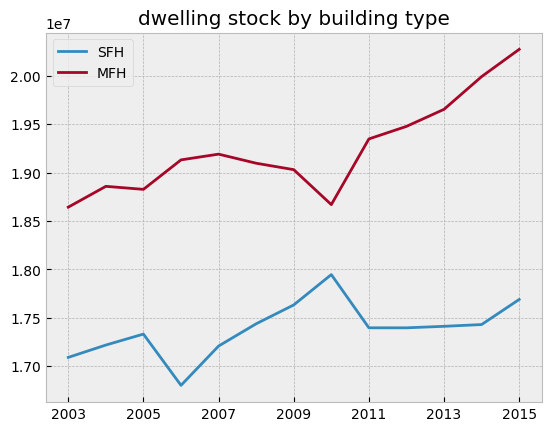

In [177]:
fig = dwelling_stock_by_building_type.plot(title='dwelling stock by building type')


<Axes: title={'center': 'dwelling stock by room number'}>

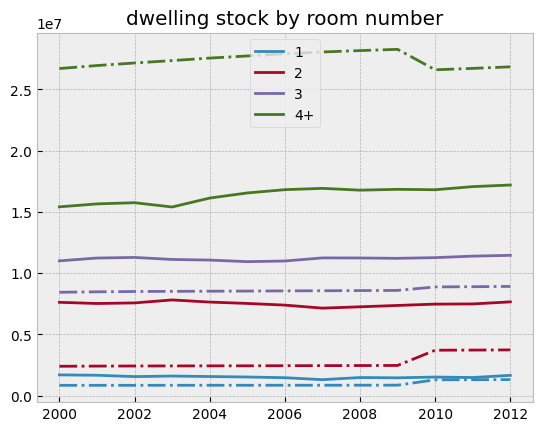

In [178]:
colors = {
    '1': '#348ABD',
    '2': '#A60628',
    '3':'#7A68A6',
    '4+':'#467821'
}

ax = dwelling_stock_by_room_number.plot(title='dwelling stock by room number', color=colors)
destatis_byrooms[:-9].plot(ax=ax, linestyle='dashdot', color=colors, legend=False)

In [179]:
total_dwellings = pd.DataFrame()
total_dwellings['INHABIT'] = dwelling_stock_by_building_type.sum(axis=1)
total_dwellings['deStatis'] = destatis_byrooms.sum(axis=1)
total_dwellings['Differenz'] = total_dwellings['deStatis']-total_dwellings['INHABIT']

In [180]:
total_dwellings['deStatis']

2003    39141543
2004    39362266
2005    39551203
2006    39753733
2007    39918193
2008    40057282
2009    40183563
2010    40479270
2011    40630302
2012    40805805
2013    40995141
2014    41221210
2015    41446269
Name: deStatis, dtype: int64

In [181]:
statista_leerstand.iloc[2:-7].index

Index(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015'],
      dtype='object')

In [182]:
total_dwellings['Leerstand [%]'] = statista_leerstand[2:-7]
total_dwellings['Leerstand'] = total_dwellings['Leerstand [%]'] * total_dwellings['deStatis']/100
total_dwellings['Wohnheime'] = destatis_wohnheime
total_dwellings['deStatis ohne Leerstand'] = total_dwellings['deStatis']-total_dwellings['Leerstand']
total_dwellings['deStatis ohne Leerstand&Wohnheime'] = total_dwellings['deStatis ohne Leerstand']-total_dwellings['Wohnheime']
total_dwellings['Differenz ohne Leerstand'] = total_dwellings['deStatis ohne Leerstand'] - total_dwellings['INHABIT']


In [183]:
total_dwellings

INHABIT  deStatis   Differenz  Leerstand [%]    Leerstand  \
2003  35732047.31  39141543  3409495.69            3.8  1487378.634   
2004  36074782.13  39362266  3287483.87            3.9  1535128.374   
2005  36156741.43  39551203  3394461.57            3.9  1542496.917   
2006  35931725.12  39753733  3822007.88            4.1  1629903.053   
2007  36396842.91  39918193  3521350.09            3.9  1556809.527   
2008  36533068.35  40057282  3524213.65            3.7  1482119.434   
2009  36661440.76  40183563  3522122.24            3.7  1486791.831   
2010  36613713.06  40479270  3865556.94            3.6  1457253.720   
2011  36742504.20  40630302  3887797.80            3.4  1381430.268   
2012  36872068.78  40805805  3933736.22            3.3  1346591.565   
2013  37063924.36  40995141  3931216.64            3.1  1270849.371   
2014  37420159.55  41221210  3801050.45            3.0  1236636.300   
2015  37961067.54  41446269  3485201.46            3.0  1243388.070   

      Wohnheime  deStatis ohne Leerstand  deStatis ohne Leerstand&Wohnheime  \
2003        NaN             3.765416e+07                                NaN   
2004        NaN             3.782714e+07                                NaN   
2005        NaN             3.800871e+07                                NaN   
2006        NaN             3.812383e+07                                NaN   
2007        NaN             3.836138e+07                                NaN   
2008        NaN             3.857516e+07                                NaN   
2009        NaN             3.869677e+07                                NaN   
2010   401702.0             3.902202e+07                       3.862031e+07   
2011   405954.0             3.924887e+07                       3.884292e+07   
2012   410392.0             3.945921e+07                       3.904882e+07   
2013   416694.0             3.972429e+07                       3.930760e+07   
2014   426307.0             3.998457e+07                       3.955827e+07   
2015   435079.0             4.020288e+07                       3.976780e+07   

      Differenz ohne Leerstand  
2003               1922117.056  
2004               1752355.496  
2005               1851964.653  
2006               2192104.827  
2007               1964540.563  
2008               2042094.216  
2009               2035330.409  
2010               2408303.220  
2011               2506367.532  
2012               2587144.655  
2013               2660367.269  
2014               2564414.150  
2015               2241813.390

In [184]:
total_dwellings.describe()

INHABIT      deStatis     Differenz  Leerstand [%]     Leerstand  \
count  1.300000e+01  1.300000e+01  1.300000e+01      13.000000  1.300000e+01   
mean   3.662770e+07  4.027275e+07  3.645053e+06       3.569231  1.435137e+06   
std    6.155437e+05  7.264023e+05  2.318640e+05       0.372793  1.278807e+05   
min    3.573205e+07  3.914154e+07  3.287484e+06       3.000000  1.236636e+06   
25%    3.615674e+07  3.975373e+07  3.485201e+06       3.300000  1.346592e+06   
50%    3.661371e+07  4.018356e+07  3.524214e+06       3.700000  1.482119e+06   
75%    3.687207e+07  4.080580e+07  3.865557e+06       3.900000  1.535128e+06   
max    3.796107e+07  4.144627e+07  3.933736e+06       4.100000  1.629903e+06   

           Wohnheime  deStatis ohne Leerstand  \
count       6.000000             1.300000e+01   
mean   416021.333333             3.883762e+07   
std     12708.469454             8.410755e+05   
min    401702.000000             3.765416e+07   
25%    407063.500000             3.812383e+07   
50%    413543.000000             3.869677e+07   
75%    423903.750000             3.945921e+07   
max    435079.000000             4.020288e+07   

       deStatis ohne Leerstand&Wohnheime  Differenz ohne Leerstand  
count                       6.000000e+00              1.300000e+01  
mean                        3.919095e+07              2.209917e+06  
std                         4.354856e+05              3.080347e+05  
min                         3.862031e+07              1.752355e+06  
25%                         3.889439e+07              1.964541e+06  
50%                         3.917821e+07              2.192105e+06  
75%                         3.949560e+07              2.506368e+06  
max                         3.976780e+07              2.660367e+06

<Axes: title={'center': 'total number of dwellings'}>

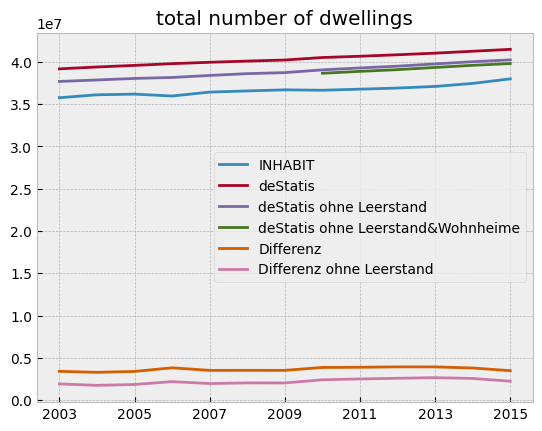

In [185]:
total_dwellings[['INHABIT', 'deStatis', 'deStatis ohne Leerstand', 'deStatis ohne Leerstand&Wohnheime' ,  'Differenz', 'Differenz ohne Leerstand']].plot(title = 'total number of dwellings')

<Axes: >

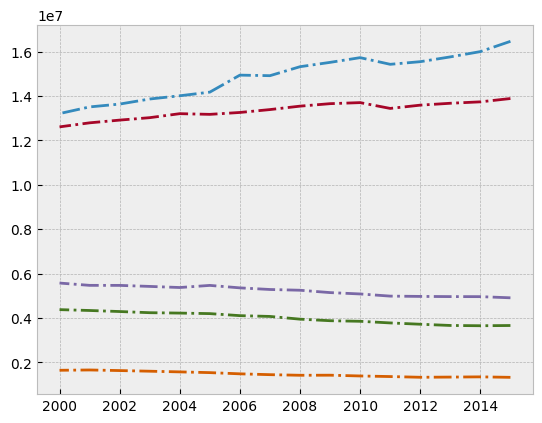

In [186]:
destatis_households.iloc[::-1].plot(linestyle='dashdot',  legend=False)

In [187]:
#household_stock_by_size.plot(title='household stock by size', color=colors)

In [188]:
destatis_households

1           2          3          4         5+
2000  13209966.0  12611214.0  5575878.0  4378374.0  1646568.0
2001  13510562.0  12793521.0  5472155.0  4339985.0  1660516.0
2002  13638410.0  12916600.0  5470560.0  4292870.0  1633570.0
2003  13866600.0  13026200.0  5424400.0  4240200.0  1604400.0
2004  14012350.0  13206160.0  5374600.0  4222900.0  1573990.0
2005  14176832.0  13175208.0  5470408.0  4199116.0  1540960.0
2006  14942694.0  13260663.0  5359029.0  4107285.0  1486446.0
2007  14917674.0  13390668.0  5285790.0  4072016.0  1448698.0
2008  15322120.0  13545070.0  5252170.0  3949000.0  1421640.0
2009  15517320.0  13656825.0  5146050.0  3879330.0  1425060.0
2010  15729912.0  13704090.0  5084416.0  3853034.0  1390270.0
2011  15429744.0  13442580.0  4987392.0  3779508.0  1363740.0
2012  15548505.0  13590255.0  4973955.0  3720675.0  1331610.0
2013  15764000.0  13675270.0  4965660.0  3665130.0  1339940.0
2014  16002324.0  13738968.0  4963500.0  3653136.0  1350072.0
2015  16464704.0  13888320.0  4911232.0  3663296.0  1328448.0

<Axes: title={'center': 'household stock by size'}>

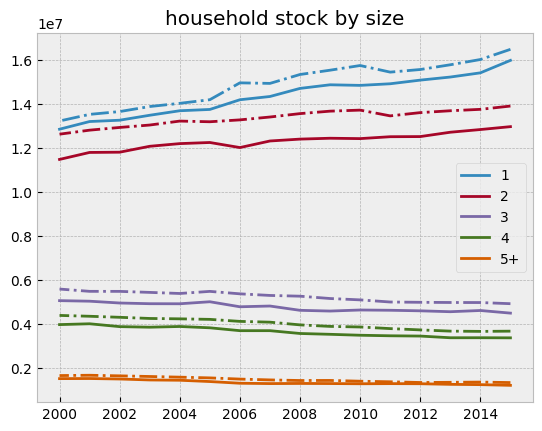

In [189]:
colors = {
    '1': '#348ABD',
    '2': '#A60628',
    '3':'#7A68A6',
    '4':'#467821',
    '5+': '#D55E00'
}
#household_stock_by_size.index.name = 'Jahr'
ax = household_stock_by_size.plot(title='household stock by size', color=colors)
#destatis_households[['1','2','3','4','5+']].plot(ax=ax, linestyle='dashdot', color=colors, legend=False)
destatis_households.iloc[::-1].plot(ax=ax, linestyle='dashdot',  legend=False)

In [190]:
total_households = pd.DataFrame()
total_households['INHABIT'] = household_stock_by_size.sum(axis=1)
total_households['deStatis'] = destatis_households.sum(axis=1)
total_households['difference'] = total_households['deStatis']-total_households['INHABIT']

In [191]:
total_households

INHABIT    deStatis  difference
2000  34819155.98  37422000.0  2602844.02
2001  35501699.42  37776739.0  2275039.58
2002  35340109.38  37952010.0  2611900.62
2003  35732047.31  38161800.0  2429752.69
2004  36074782.13  38390000.0  2315217.87
2005  36156741.43  38562524.0  2405782.57
2006  35931725.12  39156117.0  3224391.88
2007  36396842.91  39114846.0  2718003.09
2008  36533068.35  39490000.0  2956931.65
2009  36661440.76  39624585.0  2963144.24
2010  36613713.06  39761722.0  3148008.94
2011  36742504.20  39002964.0  2260459.80
2012  36872068.78  39165000.0  2292931.22
2013  37063924.36  39410000.0  2346075.64
2014  37420159.55  39708000.0  2287840.45
2015  37961067.54  40256000.0  2294932.46

<Axes: title={'center': 'total number of households'}>

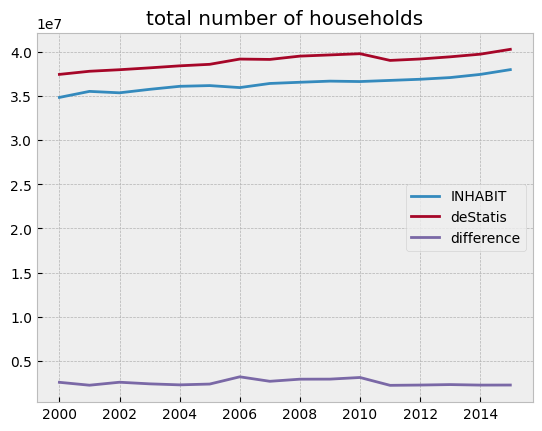

In [192]:
total_households.plot(title = 'total number of households')

In [193]:
total_dwellings.index= total_households.index[3:]

In [194]:
total_dwellings.index

Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015],
      dtype='int64')

In [195]:
total_households

INHABIT    deStatis  difference
2000  34819155.98  37422000.0  2602844.02
2001  35501699.42  37776739.0  2275039.58
2002  35340109.38  37952010.0  2611900.62
2003  35732047.31  38161800.0  2429752.69
2004  36074782.13  38390000.0  2315217.87
2005  36156741.43  38562524.0  2405782.57
2006  35931725.12  39156117.0  3224391.88
2007  36396842.91  39114846.0  2718003.09
2008  36533068.35  39490000.0  2956931.65
2009  36661440.76  39624585.0  2963144.24
2010  36613713.06  39761722.0  3148008.94
2011  36742504.20  39002964.0  2260459.80
2012  36872068.78  39165000.0  2292931.22
2013  37063924.36  39410000.0  2346075.64
2014  37420159.55  39708000.0  2287840.45
2015  37961067.54  40256000.0  2294932.46

In [197]:
households_dwellings = pd.DataFrame()
households_dwellings['hh_INHABIT'] = total_households['INHABIT'].iloc[3:]
households_dwellings['dw_INHABIT'] = total_dwellings['INHABIT']
households_dwellings['hh_deStatis'] = total_households['deStatis']
households_dwellings['dw_deStatis ohne Leerstand'] = total_dwellings['deStatis ohne Leerstand']
households_dwellings['dw_deStatis Differenz'] = households_dwellings['dw_deStatis ohne Leerstand'] - households_dwellings['hh_deStatis']

In [198]:
households_dwellings

hh_INHABIT   dw_INHABIT  hh_deStatis  dw_deStatis ohne Leerstand  \
2003  35732047.31  35732047.31   38161800.0                3.765416e+07   
2004  36074782.13  36074782.13   38390000.0                3.782714e+07   
2005  36156741.43  36156741.43   38562524.0                3.800871e+07   
2006  35931725.12  35931725.12   39156117.0                3.812383e+07   
2007  36396842.91  36396842.91   39114846.0                3.836138e+07   
2008  36533068.35  36533068.35   39490000.0                3.857516e+07   
2009  36661440.76  36661440.76   39624585.0                3.869677e+07   
2010  36613713.06  36613713.06   39761722.0                3.902202e+07   
2011  36742504.20  36742504.20   39002964.0                3.924887e+07   
2012  36872068.78  36872068.78   39165000.0                3.945921e+07   
2013  37063924.36  37063924.36   39410000.0                3.972429e+07   
2014  37420159.55  37420159.55   39708000.0                3.998457e+07   
2015  37961067.54  37961067.54   40256000.0                4.020288e+07   

      dw_deStatis Differenz  
2003            -507635.634  
2004            -562862.374  
2005            -553817.917  
2006           -1032287.053  
2007            -753462.527  
2008            -914837.434  
2009            -927813.831  
2010            -739705.720  
2011             245907.732  
2012             294213.435  
2013             314291.629  
2014             276573.700  
2015             -53119.070

<Axes: title={'center': 'Household and Dwelling Comparison'}>

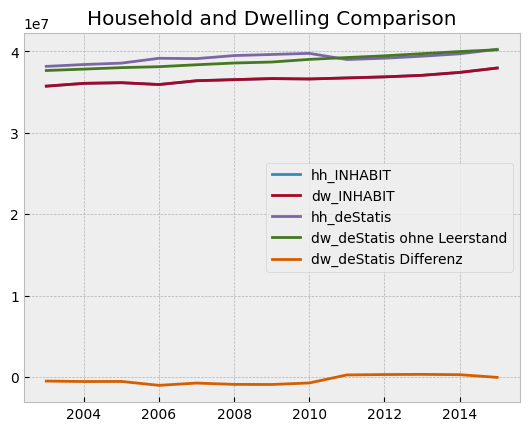

In [199]:
households_dwellings.plot(title = 'Household and Dwelling Comparison')